In [1]:
import numpy as np
from nn_lib import NeuralNetwork, Layer
from activation_functions import *
from matplotlib import pyplot as plt
from loss_functions import MSE

In [2]:
n = 64
d = 2

In [3]:
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
X = np.concatenate((x[..., np.newaxis], y[..., np.newaxis]), axis=2).reshape((n**2, 2))
z = np.cos(X[:, 0]) + np.cos(X[:, 1])

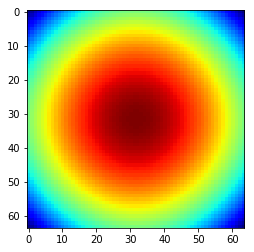

In [4]:
plt.imshow(z.reshape((n, n)), cmap='jet');

In [5]:
nn = NeuralNetwork([Layer(d, 16, Tanh()),
                    Layer(16, 1, Identity())],
                   MSE())

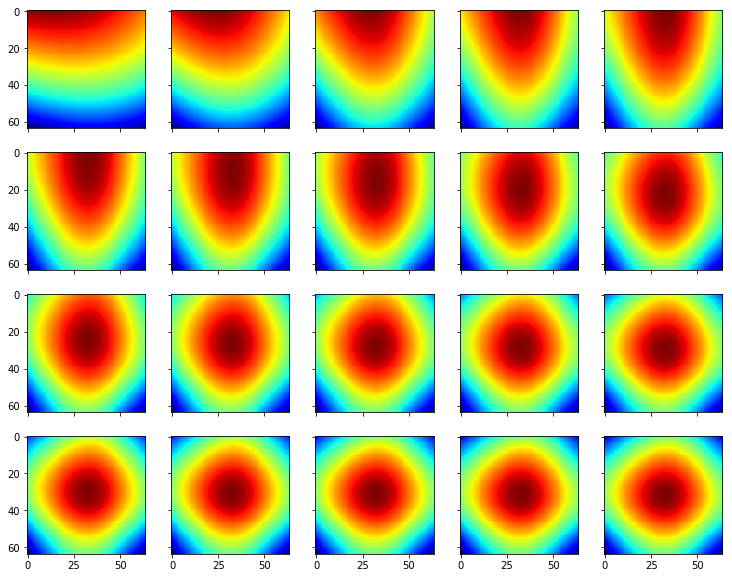

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(12.5,10))
for i in range(20):
    nn.fit(X, z[..., np.newaxis], epochs=5, gamma=0.001)
    pred = nn(X)[:,0]
    axes[i // 5, i % 5].imshow(pred.reshape((n,n)), cmap='jet')

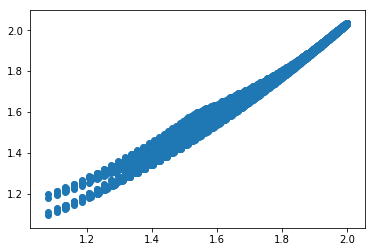

In [7]:
plt.scatter(z, pred);

In [8]:
middle = nn.layers[0](X)

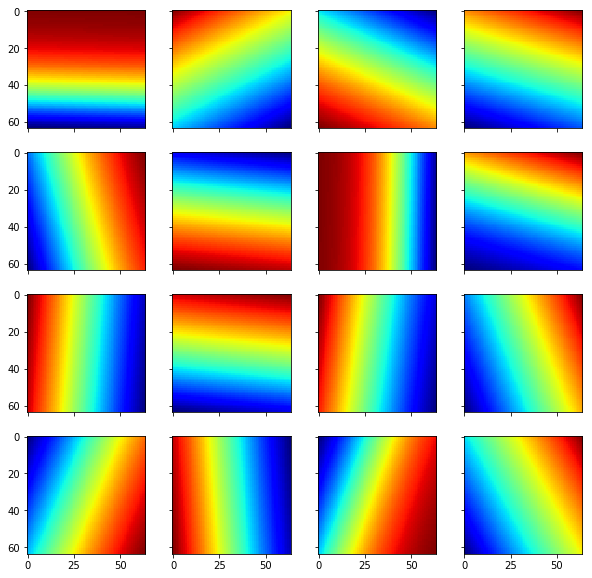

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(10,10))
for i in range(16):
    axes[i // 4, i % 4].imshow(middle[:, i].reshape((n, n)), cmap='jet')